In [180]:
import pandas as pd

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
train_data = pd.read_csv('train_product_data.csv')

In [183]:
print(train_data.head())

                            uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
2  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
3  ce5a6818f7707e2cb61fdcdbba61f5ad  2016-03-25 22:59:23 +0000   
4  29c8d290caa451f97b1c32df64477a2c  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
2  http://www.flipkart.com/alisha-solid-women-s-c...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/dilli-bazaaar-bellies-...   

                                        product_name product_category_tree  \
0                Alisha Solid Women's Cycling Shorts              Clothing   
1                                         AW Bellies              Footwear   
2                Alisha Solid Wo

In [184]:
test_data = pd.read_csv('test_data.csv')

In [185]:
print(test_data.head())

                            uniq_id            crawl_timestamp  \
0  4fb99d98225f415e7ece96938e95628f  2015-12-20 08:26:17 +0000   
1  4ea284c8d38b2ea97a1c2a26f34e057c  2015-12-20 08:26:17 +0000   
2  ee6ce2c7045c54257e2a0b590e09c296  2015-12-20 08:26:17 +0000   
3  e797ba3b5f2e2d1fdc520e48486ab60e  2015-12-20 08:26:17 +0000   
4  f4d8d43858c8858c68d75ce07ac641c0  2015-12-20 08:26:17 +0000   

                                         product_url  \
0  http://www.flipkart.com/v-v-art-brass-bracelet...   
1  http://www.flipkart.com/kalpaveda-copper-cuff/...   
2  http://www.flipkart.com/thelostpuppy-book-cove...   
3  http://www.flipkart.com/riana-copper-bangle/p/...   
4  http://www.flipkart.com/inox-jewelry-stainless...   

                                 product_name               pid  retail_price  \
0                      V&V ART Brass Bracelet  BBAE6NYHCDTEZJTB         470.0   
1                Kalpaveda Copper Copper Cuff  BBAEDFFKZJTY7SZZ        1200.0   
2  Thelostpuppy Book Co

In [186]:
test_results = pd.read_csv('test_results.csv')

In [187]:
print(test_results.head())

    product_category_tree
0              Jewellery 
1              Jewellery 
2  Mobiles & Accessories 
3              Jewellery 
4              Jewellery 


In [188]:
category_counts = train_data['product_category_tree'].value_counts()

In [189]:
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['Product Category', 'Count']

<Axes: xlabel='Count', ylabel='Product Category'>

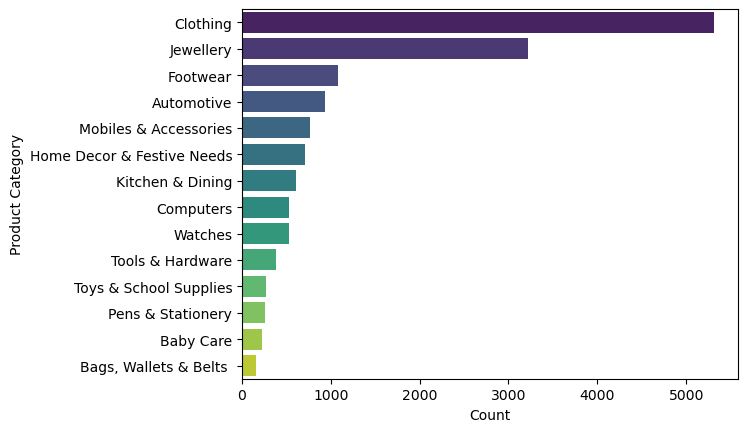

In [190]:
sns.barplot(x='Count', y='Product Category', data=category_counts_df, palette='viridis')


In [191]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [192]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

In [193]:
print(train_data.describe())

        retail_price  discounted_price
count   14942.000000      14942.000000
mean     3128.424040       2087.732298
std      9154.463342       7712.247869
min        35.000000         35.000000
25%       699.000000        349.000000
50%      1000.000000        499.000000
75%      1989.750000        999.000000
max    571230.000000     571230.000000


In [194]:
print(train_data.isnull().sum())

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 57
discounted_price             57
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4710
product_specifications        6
dtype: int64


In [195]:
print(train_data['product_category_tree'].value_counts())

product_category_tree
Clothing                      5316
Jewellery                     3218
Footwear                      1083
Automotive                     937
Mobiles & Accessories          768
Home Decor & Festive Needs     714
Kitchen & Dining               610
Computers                      531
Watches                        526
Tools & Hardware               379
Toys & School Supplies         271
Pens & Stationery              264
Baby Care                      224
Bags, Wallets & Belts          158
Name: count, dtype: int64


In [196]:
train_data['retail_price'].fillna(train_data['retail_price'].median(), inplace=True)

In [197]:
train_data['discounted_price'].fillna(train_data['discounted_price'].median(), inplace=True)

In [198]:
most_frequent_value = train_data['brand'].mode()[0] 
train_data['brand'].fillna(most_frequent_value, inplace=True)

In [199]:
most_frequent_value = train_data['product_specifications'].mode()[0] 
train_data['product_specifications'].fillna(most_frequent_value, inplace=True)

In [200]:
most_frequent_value = train_data['image'].mode()[0] 
train_data['image'].fillna(most_frequent_value, inplace=True)

In [201]:
most_frequent_value = train_data['description'].mode()[0] 
train_data['description'].fillna(most_frequent_value, inplace=True)

In [202]:
print(train_data.isnull().sum())

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64


In [203]:
print(train_data.dtypes)

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object


In [204]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14999 non-null  float64
 7   discounted_price         14999 non-null  float64
 8   image                    14999 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14999 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    14999 non-null  object 
 14  product_specifications

In [205]:
from sklearn.preprocessing import LabelEncoder

In [206]:
le = LabelEncoder()
train_data['brand_encoded'] = le.fit_transform(train_data['brand'])

In [207]:
from sklearn.ensemble import RandomForestClassifier

In [208]:
X = train_data[['retail_price', 'discounted_price','brand_encoded']]
y = train_data['product_category_tree']

In [209]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [211]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [212]:
y_val_pred = model.predict(X_val)

In [213]:
print(f'Validation Accuracy: {accuracy_score(y_val, y_val_pred)}')

Validation Accuracy: 0.7666666666666667
